In [171]:
#------------Importing EDA Libraries--------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#-------------Importing Machine Learnig Libraries--------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#---------------Importing RFE and LinearRegression-------------------------
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


#-------------Handling Warnings--------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [172]:
# load the dataset
df = pd.read_csv('day.csv')

In [173]:
# Take a look at the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [174]:
# Shape----
df.shape

(730, 16)

In [175]:
# Data Discription----
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [176]:
# Checking the dtypes and missing values----
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Some data visualization using seaborn

<function matplotlib.pyplot.show(*args, **kw)>

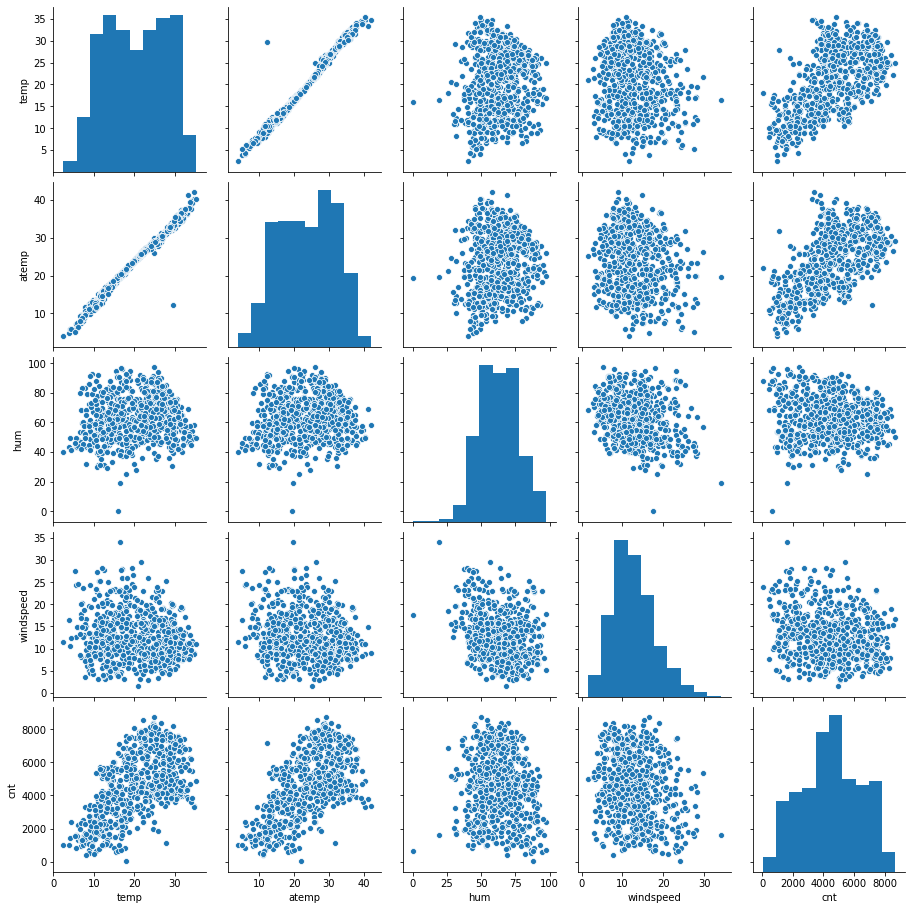

In [9]:
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])     
plt.show

#### From the above pairplot of numerical variables we can observe that there is a linear corelation of temp and atemp with the dependent variable(cnt).

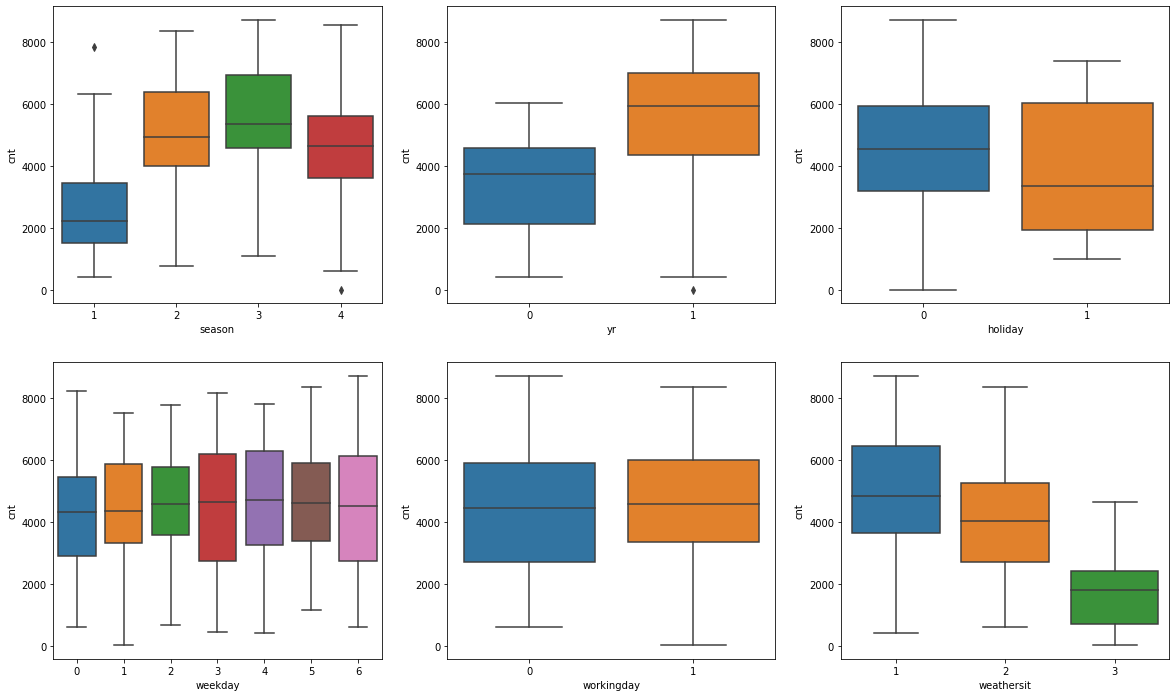

In [177]:
# Plotting boxplots to dipict the affect of each categorical variable on the target variable 'cnt'.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()
# We can see that how the median values varies for each of these categorical variables.

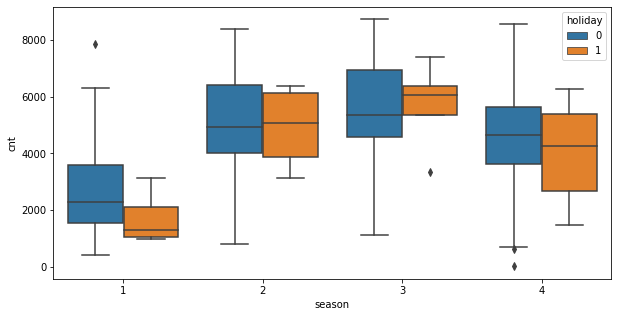

In [178]:
# Boxplot to show how 'cnt' varies on holidays for all the season 
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df)
plt.show()

### Data Preparation

In [179]:
# Droping the unnecessary columns
drop_cols = ['instant','dteday','casual','registered']
df.drop(drop_cols,axis = 1,inplace = True)

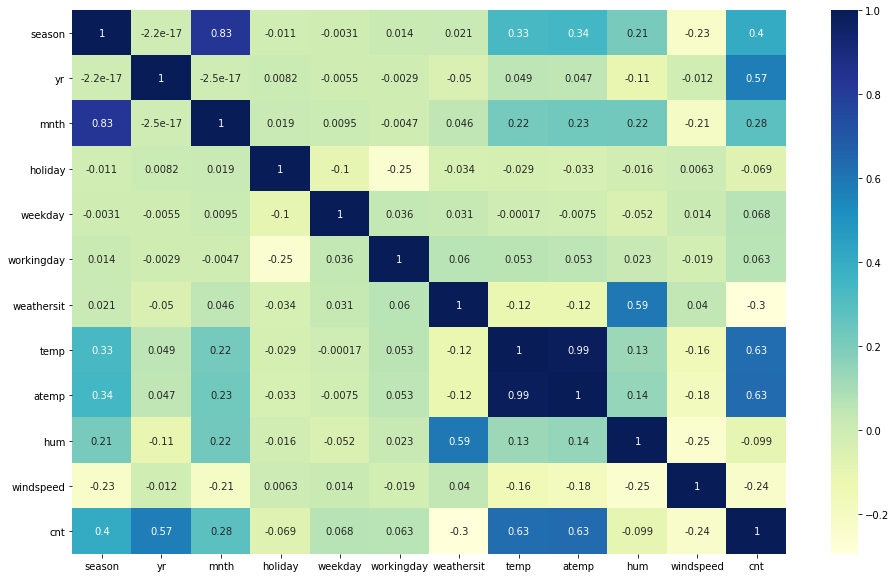

In [180]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Lets covert the binary and numerical categorical variables into categorical variables to perform dummy encoding---

In [181]:
# Season--- 
def season(value):
    if value == 1:
        return 'Spring'
    elif value == 2:
        return 'Summer'
    elif value == 3:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['season'].apply(season)


# Year---

def year(value):
    if value == 0:
        return '2018'
    else:
        return '2019'
df['Yr'] = df['yr'].apply(year)

# Weekday---

def weekday(value):
    if value == 0:
        return 'sunday'
    elif value == 1:
        return 'monday'
    elif value == 2:
        return 'tuesday'
    elif value ==3:
        return 'wednesday'
    elif value ==4:
        return 'thursday'
    elif value == 5:
        return 'friday'
    else:
        return 'saturday'
    
df['Weekday'] = df['weekday'].apply(weekday) 

# Weathersit---

def weathersit(value):
    if value == 1:
        return 'clear'
    elif value == 2:
        return 'mist'
    elif value == 3:
        return 'snow'
    else:
        return 'heavy_rain'
    
df['Weathersit'] = df['weathersit'].apply(weathersit)


# Month---

def month(value):
    if value == 1:
        return 'jan'
    elif value == 2:
        return 'feb'
    elif value == 3:
        return 'mar'
    elif value == 4:
        return 'apr'
    elif value == 5:
        return 'may'
    elif value == 6:
        return 'jun'
    elif value == 7:
        return 'jul'
    elif value == 8:
        return 'aug'
    elif value == 9:
        return 'sep'
    elif value == 10:
        return 'oct'
    elif value == 11:
        return 'nov'
    else:
        return 'dec'

df['Month'] = df['mnth'].apply(month) 

# Holiday

def holiday(value):
    if value == 0:
        return 'No_holiday'
    else:
        return 'Yes_holiday'
    
df['Holiday'] = df['holiday'].apply(holiday)

def workingday(value):
    if value == 0:
        return 'No_working'
    else:
        return 'Yes_working'
    
df['Workingday'] = df['workingday'].apply(workingday)


In [182]:
# Drop the columns which has been modified

drop_columns = ['season','yr','weekday','weathersit','mnth','holiday','workingday']
df.drop(drop_columns,axis=1,inplace = True)

In [183]:
# Lets look at the dataset after conversion into categorical variables
df.head()
col = ['temp','windspeed','Workingday','Season','Weathersit','Yr','Month']

In [184]:
# Checking the dtypes of the variables
df.info()
# We can see that all the binary and numerical categorical columns have been converted into categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   cnt         730 non-null    int64  
 5   Season      730 non-null    object 
 6   Yr          730 non-null    object 
 7   Weekday     730 non-null    object 
 8   Weathersit  730 non-null    object 
 9   Month       730 non-null    object 
 10  Holiday     730 non-null    object 
 11  Workingday  730 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


#### Dummy Encoding --

In [185]:
# Season variable
season = pd.get_dummies(df['Season'],drop_first=True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [186]:
# Year variable
yr = pd.get_dummies(df['Yr'],drop_first=True)
yr.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [187]:
# Weekday variable
weekday = pd.get_dummies(df['Weekday'],drop_first=True)
weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [188]:
# Weathersit variable
weathersit = pd.get_dummies(df['Weathersit'],drop_first=True)
weathersit.head()

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [189]:
# month variable
month = pd.get_dummies(df['Month'],drop_first=True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [190]:
# Holiday variable
holiday = pd.get_dummies(df['Holiday'],drop_first=True)
holiday.head()

,Yes_holiday
0,0
1,0
2,0
3,0
4,0


In [191]:
# Working day variable
workingday = pd.get_dummies(df['Workingday'],drop_first=True)
workingday.head()

,Yes_working
0,0
1,0
2,1
3,1
4,1


#### Now that we have all the dummy variables lets perform two tasks--

##### Drop the orginal columns 
##### Concatenate these dummy variables to the main dataset

In [192]:
# Firsly we will merge them altogether
frames = [df,season,yr,weekday,weathersit,month,holiday,workingday]
df = pd.concat(frames,axis = 1)

In [193]:
# Dataset
df.head()

,temp,atemp,hum,windspeed,cnt,Season,Yr,Weekday,Weathersit,Month,...,jan,jul,jun,mar,may,nov,oct,sep,Yes_holiday,Yes_working
0,14.110847,18.18125,80.5833,10.749882,985,Spring,2018,saturday,mist,jan,...,1,0,0,0,0,0,0,0,0,0
1,14.902598,17.68695,69.6087,16.652113,801,Spring,2018,sunday,mist,jan,...,1,0,0,0,0,0,0,0,0,0
2,8.050924,9.47025,43.7273,16.636703,1349,Spring,2018,monday,clear,jan,...,1,0,0,0,0,0,0,0,0,1
3,8.200000,10.60610,59.0435,10.739832,1562,Spring,2018,tuesday,clear,jan,...,1,0,0,0,0,0,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1600,Spring,2018,wednesday,clear,jan,...,1,0,0,0,0,0,0,0,0,1


In [194]:
# Shape
df.shape

(730, 37)

In [195]:
# lets drop the columns we used dummy encoding for--
drop_col1 = ['Season','Yr','Weekday','Weathersit','Month','Holiday','Workingday']
df.drop(drop_col1,axis = 1, inplace = True)

In [196]:
# Head
df.head()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,2019,monday,...,jan,jul,jun,mar,may,nov,oct,sep,Yes_holiday,Yes_working
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [197]:
# Dataset columns
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer',
       'Winter', '2019', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'mist', 'snow', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'Yes_holiday', 'Yes_working'],
      dtype='object')

In [198]:
# Shape
df.shape

(730, 30)

#### Lets look at the correlation of different variables

In [199]:
#------------- Correlation between atemp and other variables
print(round(df.atemp.corr(df.cnt),4))
print(round(df.atemp.corr(df.hum),4))
print(round(df.atemp.corr(df.windspeed),4))

# We can see that actual temp has a positive correlation with the cnt variable 

0.6307
0.1415
-0.1839


In [200]:
#------------- Correlation between hum and other variables
print(round(df.hum.corr(df.cnt),4))
print(round(df.hum.corr(df.Summer),4))
print(round(df.hum.corr(df.windspeed),4))

# We can see that as the humidity increases the cnt decreases which states that bikers do not like the 
# humid weather

-0.0985
-0.0029
-0.2485


In [201]:
#------------- Correlation between windspeed and other variables
print(round(df.windspeed.corr(df.cnt),4))
print(round(df.windspeed.corr(df.atemp),4))
print(round(df.windspeed.corr(df.Winter),4))

# We can see that as the windpeed increases the cnt decreases which states that bikers do not like the 
# windy climate

-0.2351
-0.1839
-0.1356


In [202]:
# Spliting the data into train and test datasets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [203]:
#Shape of train and test data
print(df_train.shape)
print(df_test.shape)
df_train

(510, 30)
(219, 30)


,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,2019,monday,...,jan,jul,jun,mar,may,nov,oct,sep,Yes_holiday,Yes_working
653,19.201653,23.04230,55.8333,12.208807,7534,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
576,29.246653,33.14480,70.4167,11.083475,7216,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
426,16.980847,20.67460,62.1250,10.792293,4066,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
482,15.443347,18.87520,48.9583,8.708325,4220,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,29.554153,32.98605,58.7917,13.916771,6664,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
578,30.852500,35.35440,65.9583,8.666718,7261,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
53,9.091299,12.28585,42.3043,6.305571,1917,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350,10.591653,12.46855,56.0833,16.292189,2739,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Scaling the some of the features
var = ['temp','atemp','hum','windspeed']

In [117]:
scaler = MinMaxScaler()
df_train[var] = scaler.fit_transform(df_train[var])

In [118]:
# Dividing the training dataset into X and y.
y_train = df_train.pop('cnt')
X_train = df_train

In [119]:
# Building a model using statsmodel
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [120]:
# First model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          8.42e-181
Time:                        21:33:55   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2149.1961    306.569      7.010      0.000    1546.816    2751.576
temp         3488.2885   1236.530      2.821      0.005    1058.620    5917.957
atemp         440.0543   1202.068      0.366      0.714   -1921.899    2802.007
hum         -1319.5510    334.932     -3.940      0.000   -1977.661    -661.441
windspeed   -1602.6993    228.847     -7.003      0.000   -2052.362   -1153.037
Spring       -422.2586    260.904     -1.618      0.106    -934.911      90.394
Summer        332.1707    228.255      1.455      0.146    -116.329     780.671
Winter        916.0272    242.975      3.770      0.000     438.603    1393.451
2019         2018.3484     70.102     28.792      0.000    1880.604    2156.092
monday       -186.8949    133.933     -1.395      0.164    -450.061      76.271
saturday      839.3479    119.559      7.020      0.000     604.425    1074.271
sunday        365.3504    121.367      3.010      0.003     126.875     603.825
thursday      -84.7453    135.502     -0.625      0.532    -350.994     181.503
tuesday      -167.8272    135.152     -1.242      0.215    -433.388      97.734
wednesday     -49.8292    129.803     -0.384      0.701    -304.881     205.222
mist         -530.4746     90.763     -5.845      0.000    -708.815    -352.134
snow        -2231.2111    229.741     -9.712      0.000   -2682.632   -1779.791
aug           139.7327    295.612      0.473      0.637    -441.119     720.584
dec          -396.1100    292.099     -1.356      0.176    -970.057     177.837
feb          -279.6740    286.066     -0.978      0.329    -841.768     282.419
jan          -543.8192    291.695     -1.864      0.063   -1116.974      29.335
jul          -341.3928    306.035     -1.116      0.265    -942.724     259.939
jun           -14.8072    220.224     -0.067      0.946    -447.527     417.912
mar            11.1950    213.444      0.052      0.958    -408.202     430.592
may           214.6148    183.563      1.169      0.243    -146.069     575.299
nov          -363.1752    316.181     -1.149      0.251    -984.442     258.092
oct            66.8842    311.297      0.215      0.830    -544.786     678.555
sep           711.0555    278.938      2.549      0.011     162.969    1259.142
Yes_holiday    97.3073    209.528      0.464      0.643    -314.395     509.010
Yes_working   847.1905    106.639      7.944      0.000     637.655    1056.726
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                     1.01e+16
================================================

#### From the above model we can see that there many variable having p value greater than 0.05 making them highly insignificant for the model.

In [121]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [122]:
# List of 15 columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('2019', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 12),
 ('tuesday', False, 10),
 ('wednesday', False, 13),
 ('mist', True, 1),
 ('snow', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('Yes_holiday', True, 1),
 ('Yes_working', True, 1)]

In [123]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter', '2019',
       'saturday', 'mist', 'snow', 'jan', 'jul', 'sep', 'Yes_holiday',
       'Yes_working'],
      dtype='object')

In [124]:
# Columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'aug',
       'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [125]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [126]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [127]:
# Second model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [128]:
# Summary statistics
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          2.31e-191
Time:                        21:34:01   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2204.0556    314.032      7.019      0.000    1587.052    2821.059
temp         4431.4973    298.389     14.851      0.000    3845.228    5017.766
hum         -1344.7934    324.457     -4.145      0.000   -1982.280    -707.307
windspeed   -1616.3289    221.379     -7.301      0.000   -2051.289   -1181.369
Spring       -441.6037    179.462     -2.461      0.014    -794.207     -89.001
Summer        431.6424    129.004      3.346      0.001     178.177     685.107
Winter        820.7507    149.808      5.479      0.000     526.411    1115.090
2019         2003.5240     69.550     28.807      0.000    1866.873    2140.175
saturday      466.9445    125.957      3.707      0.000     219.467     714.422
mist         -502.6064     90.177     -5.574      0.000    -679.784    -325.429
snow        -2162.3728    226.178     -9.560      0.000   -2606.763   -1717.983
jan          -298.3585    150.718     -1.980      0.048    -594.486      -2.231
jul          -462.3542    156.871     -2.947      0.003    -770.570    -154.138
sep           705.6663    143.010      4.934      0.000     424.684     986.648
Yes_holiday  -508.7381    233.568     -2.178      0.030    -967.646     -49.830
Yes_working   378.2822    100.057      3.781      0.000     181.693     574.872
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above summary statistics we can see that the significance of each variable has increased,however the adj R2 value has dropped a little. Therefore we will check the VIFs of the variables.

In [129]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,29.40
0,temp,17.77
14,Yes_working,5.31
2,windspeed,4.73
3,Spring,4.53
5,Winter,3.48
4,Summer,2.84
8,mist,2.29
6,2019,2.09
7,saturday,1.98


#### From the above VIF result we can see that Humidity has high multicolinearity with the other variables.

In [130]:
X_train_new = X_train[col].drop(["hum"], axis = 1)

In [131]:
X_train_lm = sm.add_constant(X_train_new)

In [132]:
# Third model
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [133]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          7.33e-189
Time:                        21:34:26   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1531.4807    273.216      5.605      0.000     994.675    2068.286
temp         4109.7764    292.787     14.037      0.000    3534.517    4685.035
windspeed   -1358.2502    215.885     -6.292      0.000   -1782.415    -934.086
Spring       -518.9473    181.383     -2.861      0.004    -875.322    -162.572
Summer        376.8183    130.405      2.890      0.004     120.603     633.034
Winter        692.7446    148.966      4.650      0.000     400.060     985.429
2019         2037.0675     70.197     29.019      0.000    1899.146    2174.989
saturday      507.9043    127.604      3.980      0.000     257.191     758.618
mist         -718.1429     74.866     -9.592      0.000    -865.238    -571.048
snow        -2535.6933    210.833    -12.027      0.000   -2949.932   -2121.455
jan          -338.5243    152.845     -2.215      0.027    -638.829     -38.220
jul          -419.1439    159.061     -2.635      0.009    -731.663    -106.625
sep           654.6655    144.789      4.522      0.000     370.189     939.142
Yes_holiday  -488.4777    237.302     -2.058      0.040    -954.721     -22.234
Yes_working   404.1942    101.480      3.983      0.000     204.809     603.579
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Surely the VIF values have come down

,Features,VIF
0,temp,7.07
13,Yes_working,5.24
1,windspeed,4.67
2,Spring,3.08
3,Summer,2.33
5,2019,2.08
4,Winter,1.99
6,saturday,1.97
9,jan,1.62
10,jul,1.59


#### We can see that temp and Yes_working have high VIF values so we will drop them 

In [135]:
X_train_new = X_train[col].drop(['temp','Yes_working'], axis = 1)

In [136]:
X_train_lm = sm.add_constant(X_train_new)

In [137]:
# Fourth model
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [138]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          1.41e-151
Time:                        21:34:29   Log-Likelihood:                -4206.1
No. Observations:                 510   AIC:                             8440.
Df Residuals:                     496   BIC:                             8500.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5223.3111    292.987     17.828      0.000    4647.662    5798.961
hum          -166.7442    379.907     -0.439      0.661    -913.170     579.682
windspeed   -1675.0154    268.804     -6.231      0.000   -2203.151   -1146.880
Spring      -2288.6104    158.754    -14.416      0.000   -2600.524   -1976.697
Summer       -392.8044    141.808     -2.770      0.006    -671.423    -114.186
Winter       -676.7319    136.346     -4.963      0.000    -944.619    -408.845
2019         2153.2756     83.605     25.755      0.000    1989.013    2317.539
saturday      143.5981    115.397      1.244      0.214     -83.128     370.324
mist         -736.7497    107.107     -6.879      0.000    -947.190    -526.310
snow        -2558.0098    271.523     -9.421      0.000   -3091.488   -2024.532
jan          -886.4802    176.546     -5.021      0.000   -1233.350    -539.611
jul          -113.1872    187.900     -0.602      0.547    -482.365     255.991
sep           627.9677    173.548      3.618      0.000     286.988     968.948
Yes_holiday  -835.1475    266.031     -3.139      0.002   -1357.834    -312.461
==============================================================================
Omnibus:                       34.118   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.233
Skew:                          -0.438   Prob(JB):                     5.05e-14
Kurtosis:                       4.454   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Clearly dropping the temp and Yes_working variable has decreased the adj R2 value, therefore we will keep them.

In [139]:
X_train_new = X_train[col].drop(['Yes_working','hum'], axis = 1)

In [140]:
X_train_lm = sm.add_constant(X_train_new)

In [141]:
# Fifth model
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [142]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          1.21e-186
Time:                        21:34:32   Log-Likelihood:                -4122.7
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1865.5493    263.891      7.069      0.000    1347.068    2384.030
temp         4120.5759    297.129     13.868      0.000    3536.789    4704.363
windspeed   -1365.0641    219.089     -6.231      0.000   -1795.522    -934.606
Spring       -532.8143    184.047     -2.895      0.004    -894.421    -171.207
Summer        369.2809    132.330      2.791      0.005     109.284     629.278
Winter        668.4128    151.055      4.425      0.000     371.626     965.199
2019         2039.4311     71.239     28.628      0.000    1899.464    2179.399
saturday      175.0141     97.858      1.788      0.074     -17.254     367.282
mist         -702.2436     75.872     -9.256      0.000    -851.314    -553.174
snow        -2493.3830    213.697    -11.668      0.000   -2913.247   -2073.519
jan          -332.8061    155.111     -2.146      0.032    -637.562     -28.050
jul          -444.8043    161.295     -2.758      0.006    -761.709    -127.899
sep           660.8725    146.934      4.498      0.000     372.183     949.562
Yes_holiday  -816.3615    225.876     -3.614      0.000   -1260.153    -372.570
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.16
1,windspeed,4.64
2,Spring,2.76
3,Summer,2.23
5,2019,2.07
4,Winter,1.80
9,jan,1.61
10,jul,1.59
7,mist,1.56
11,sep,1.34


#### We can see that removing the humidity has decreased the adj R2 value, therfore the predictive power gets decreased

In [144]:
# We will try to find the variables humidity is correlated with and try removing them.
#------------- Correlation between hum and other variables
print(round(df.hum.corr(df.cnt),4))
print(round(df.hum.corr(df.Summer),4))
print(round(df.hum.corr(df.windspeed),4))
print(round(df.hum.corr(df.Spring),4))
print(round(df.hum.corr(df.jan),4))
print(round(df.hum.corr(df.jul),4))
print(round(df.hum.corr(df.sep),4))
print(round(df.hum.corr(df.saturday),4))
print(round(df.hum.corr(df.Yes_holiday),4))

-0.0985
-0.0029
-0.2485
-0.1849
-0.0896
-0.0638
0.1831
-0.0233
-0.0157


In [145]:
X_train_new = X_train[col].drop(['hum','jul','jan','Yes_holiday','saturday'], axis = 1)

In [146]:
X_train_lm = sm.add_constant(X_train_new)

In [147]:
lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [148]:
# Final model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.3
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          1.87e-185
Time:                        21:34:37   Log-Likelihood:                -4133.9
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     499   BIC:                             8336.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1530.6163    263.790      5.802      0.000    1012.341    2048.892
temp         4153.6857    289.617     14.342      0.000    3584.667    4722.705
windspeed   -1278.7521    221.330     -5.778      0.000   -1713.606    -843.899
Spring       -496.3725    182.390     -2.721      0.007    -854.720    -138.025
Summer        527.1105    124.930      4.219      0.000     281.656     772.565
Winter        823.0861    146.417      5.622      0.000     535.416    1110.756
2019         2032.1315     72.522     28.021      0.000    1889.645    2174.618
mist         -692.0048     77.106     -8.975      0.000    -843.498    -540.512
snow        -2472.9105    217.682    -11.360      0.000   -2900.596   -2045.225
sep           756.9622    142.665      5.306      0.000     476.663    1037.261
Yes_working   204.2739     77.221      2.645      0.008      52.556     355.992
==============================================================================
Omnibus:                       65.646   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.508
Skew:                          -0.637   Prob(JB):                     4.70e-39
Kurtosis:                       5.586   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### So we are getting a adj. R2 value of 0.828 using exactly 10 variables

In [149]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.67
1,windspeed,4.59
9,Yes_working,3.01
2,Spring,2.12
5,2019,2.07
3,Summer,1.94
4,Winter,1.68
6,mist,1.55
8,sep,1.23
7,snow,1.08


In [150]:
X_train_new.to_csv('Cleaned_Boom_Bikes.csv',index = False)

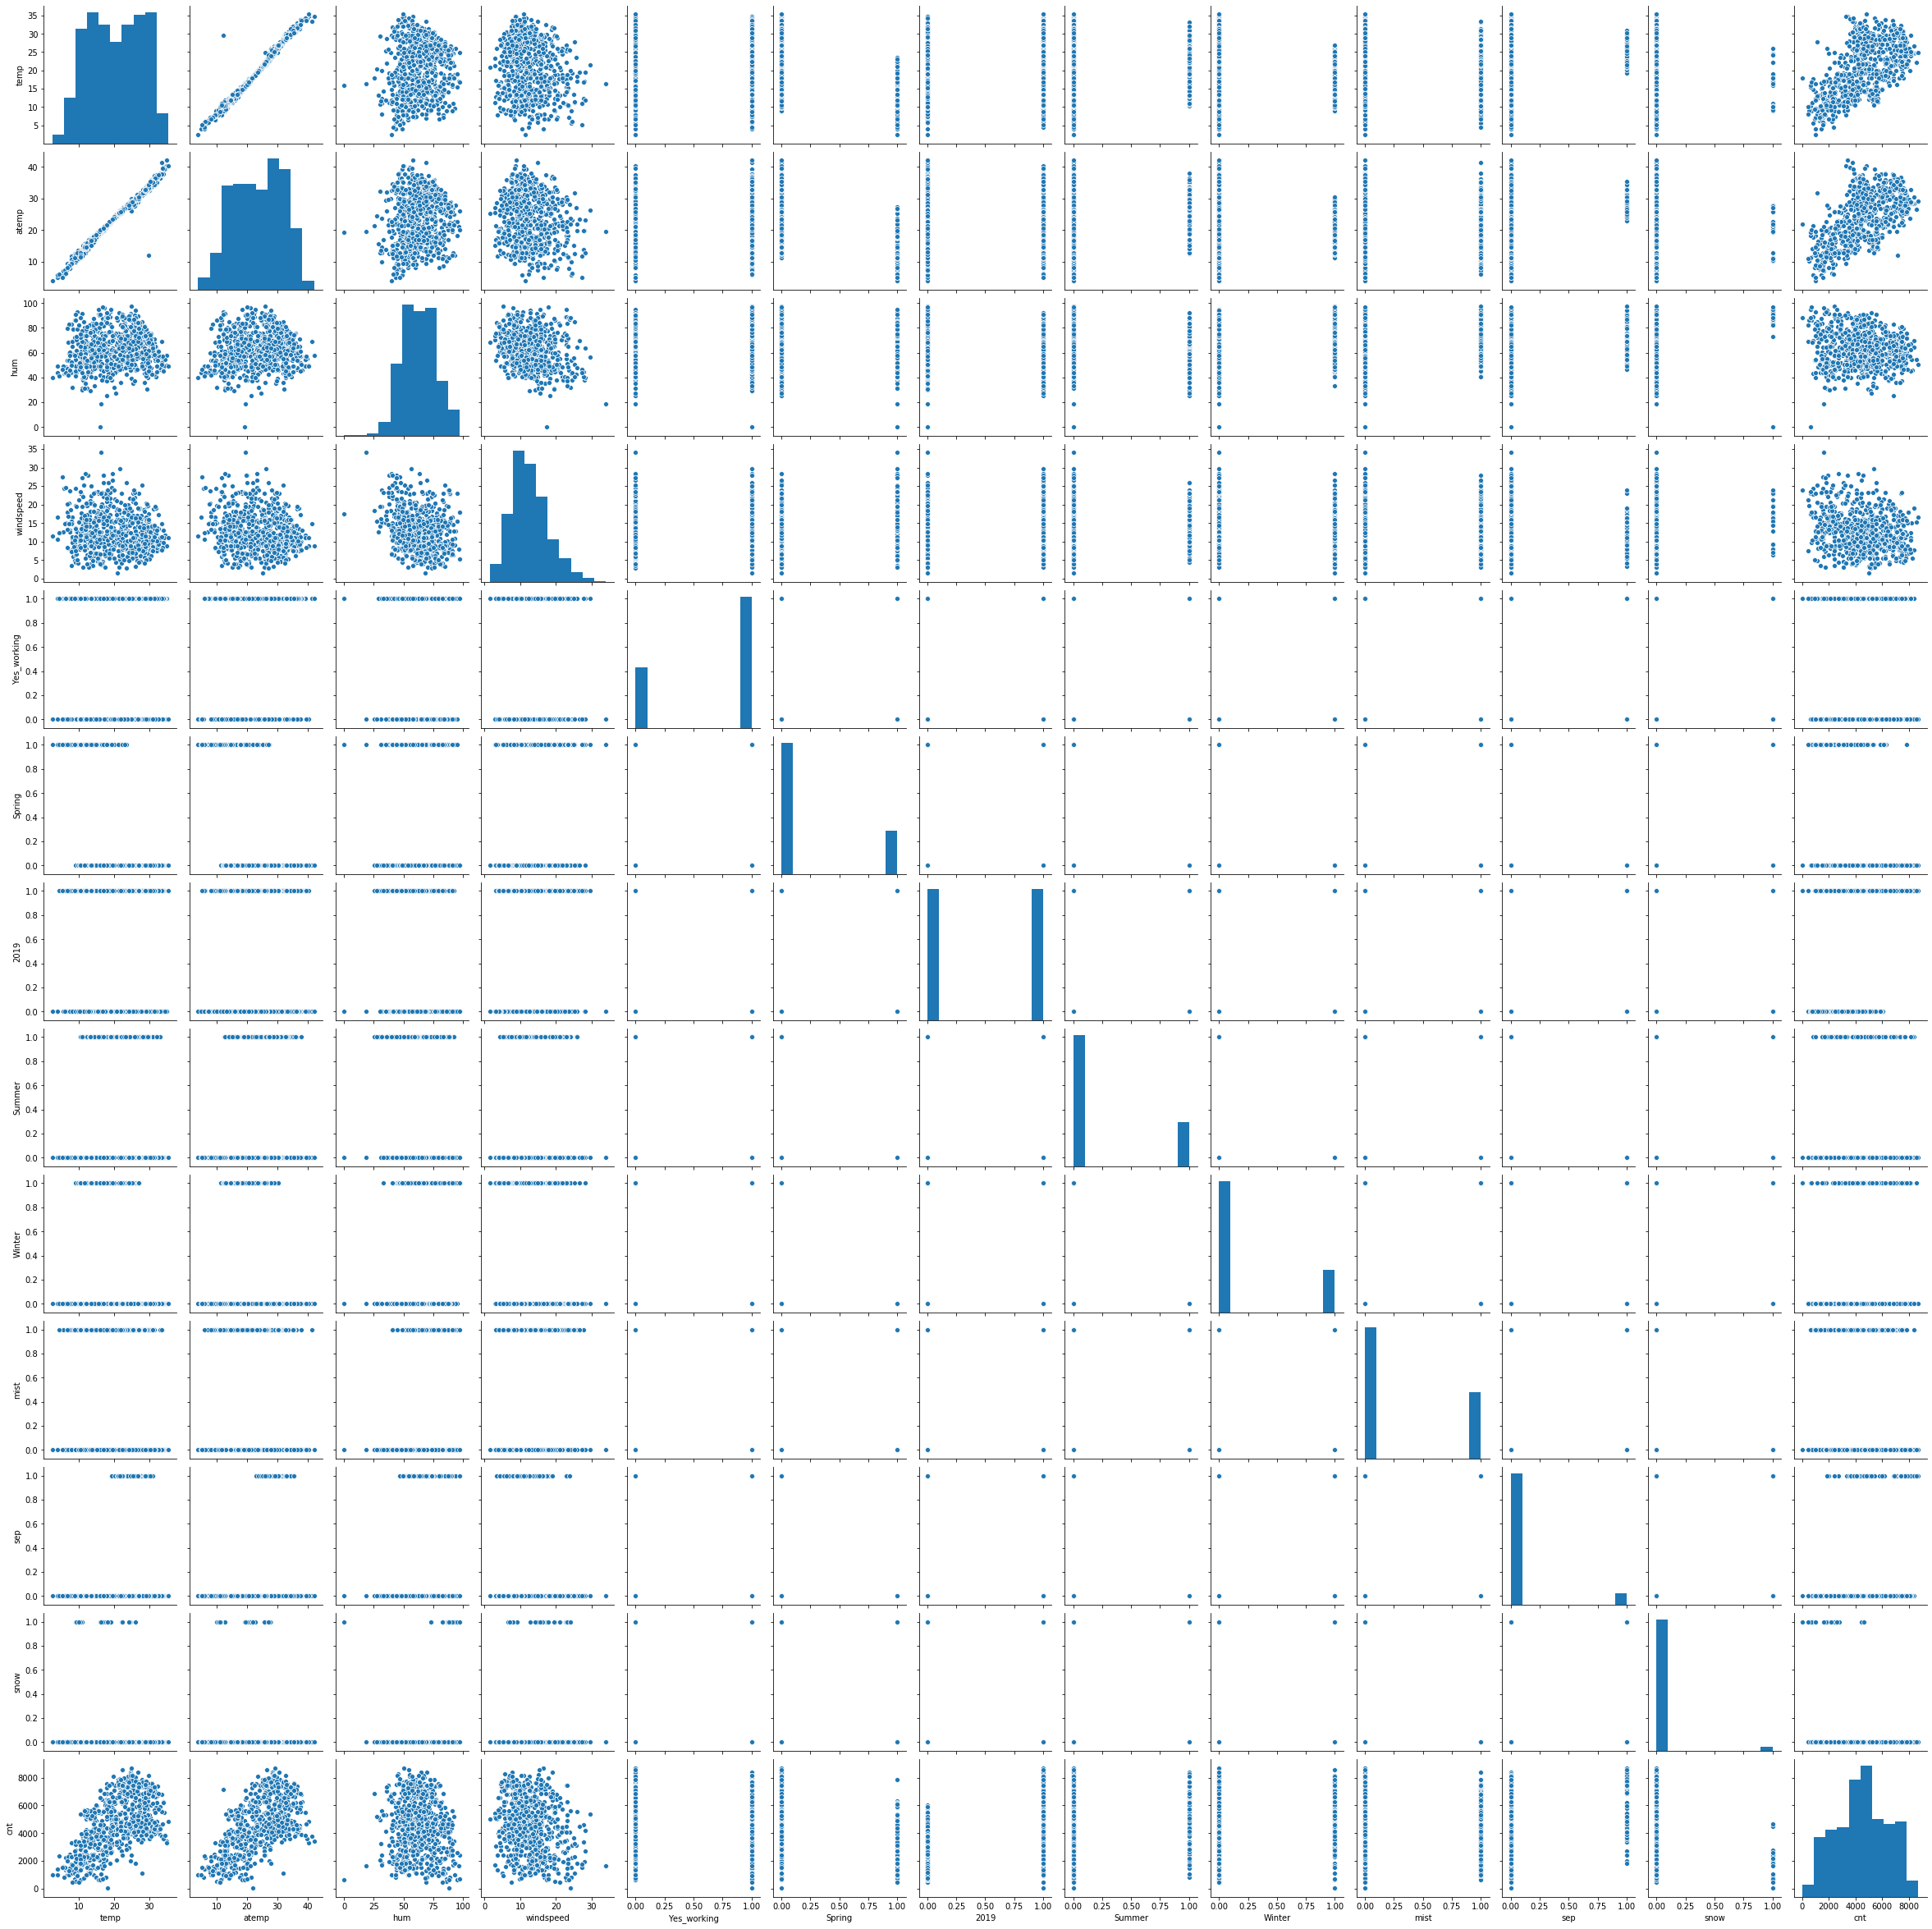

In [72]:
# Pairplot of final variables
sns.pairplot(df[['temp','atemp','hum','windspeed','Yes_working','Spring','2019','Summer','Winter','mist','sep','snow','cnt']]) 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [151]:
y_train_price = lm_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

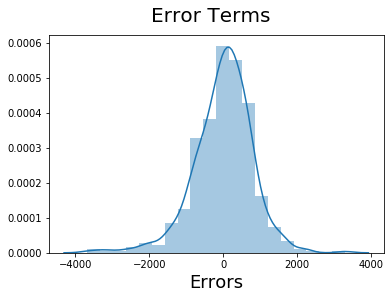

In [152]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Making Predictions

#### Applying the scaling on the test sets

In [153]:
var = ['temp','atemp','hum','windspeed']

df_test[var] = scaler.transform(df_test[var])

#### Dividing into X_test and y_test

In [154]:
y_test = df_test.pop('cnt')
X_test = df_test

In [155]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [166]:
# Making predictions
y_pred = lm_6.predict(X_test_new)
X_test_new

,const,temp,windspeed,Spring,Summer,Winter,2019,mist,snow,sep,Yes_working
184,1.0,0.831783,0.084219,0,0,0,0,1,0,0,0
535,1.0,0.901354,0.153728,0,1,0,1,0,0,0,1
299,1.0,0.511964,0.334206,0,0,1,0,1,0,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0,0,1
152,1.0,0.817246,0.537414,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.257562,0.287411,1,0,0,1,1,0,0,0
702,1.0,0.519232,0.283397,0,0,1,1,0,0,0,1
127,1.0,0.584649,0.069510,0,1,0,0,0,0,0,0
640,1.0,0.745598,0.052115,0,0,1,1,1,0,0,1


## Model Evaluation

Text(0, 0.5, 'y_pred')

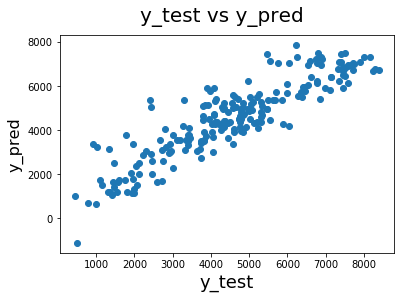

In [157]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

####  We can how linear the spread is, showing the accuracy of our model.

In [158]:
# Calculating R2 value for test data
r2 = r2_score(y_test,y_pred)
print(r2)

0.8027885585888505


#### From the final model we can say that variables ['temp','windspeed','Yes_working','Spring','2019','Summer','Winter','mist','sep','snow'] are the essential features required to predict count of bikes each year. It is pretty obvious that weather conditions and holidays affect the count of the bikes the most.


In [159]:
l_r = LinearRegression()
l_r.fit(X_train_new,y_train)
y_pred1 = l_r.predict(X_test[X_train_new.columns])
r2 = r2_score(y_test,y_pred1)
print(r2)

0.8027885585888505


In [160]:
import pickle
# we will a file to store the data
file = open('linear_regression_model.pkl','wb')

# we will dump information to that file
pickle.dump(lm_6, file)

In [161]:
file1 = open('linear_regression.pkl','wb')

# we will dump information to that file
pickle.dump(l_r, file1)

In [162]:
df.windspeed.max()

34.000021000000004

In [163]:
a = pd.read_csv('Cleaned_Boom_Bikes.csv')

In [164]:
a.head()

,temp,windspeed,Spring,Summer,Winter,2019,mist,snow,sep,Yes_working
0,0.509887,0.300794,0,0,1,1,0,0,0,1
1,0.815169,0.264686,0,0,0,1,0,0,0,1
2,0.442393,0.255342,1,0,0,1,1,0,0,0
3,0.245101,0.663106,1,0,0,1,0,0,0,0
4,0.395666,0.188475,0,1,0,1,1,0,0,0
